### Cyptocurrencies and wrangling in the data

First attempt was to wrangle in the bitcoin_dataset.csv

In [144]:
#import project_functions
#from project_functions import funcOne
### I tried to do import from another file and was unsuccessful in doing so 
### I have done all my method chaining inside this file and showed my work for trying the projection_function file

import os
import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

from pandas_datareader.data import DataReader
from datetime import date # Date & time function

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
import pandas_profiling

# Settings to produce nice plots in a Jupyter notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

#load and inspect bitcoin _dataset
bitcoin_dataset =pd.read_csv('/Users/dawsoncitygeneralstore/school/Data 301/course-project-solo_334/solo project/data/raw/Kaggle files/bitcoin_dataset.csv')
bitcoin_dataset.count()
bitcoin_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2920 non-null   object 
 1   btc_market_price                                     2920 non-null   float64
 2   btc_total_bitcoins                                   2920 non-null   float64
 3   btc_market_cap                                       2920 non-null   float64
 4   btc_trade_volume                                     2899 non-null   float64
 5   btc_blocks_size                                      2920 non-null   float64
 6   btc_avg_block_size                                   2920 non-null   float64
 7   btc_n_orphaned_blocks                                2920 non-null   float64
 8   btc_n_transactions_per_block                         2920 non-null  

### Checking a heat map for corrilation

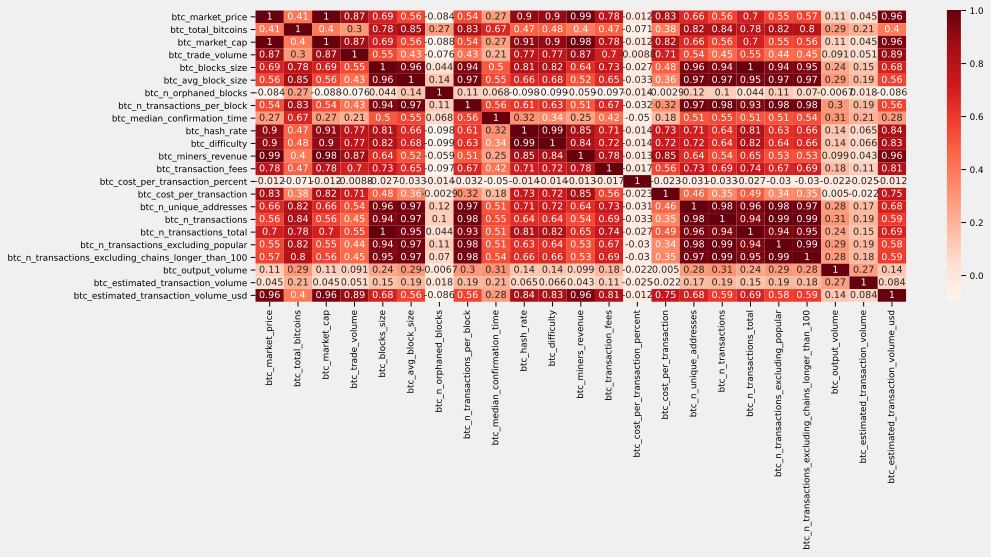

In [145]:
plt.figure(figsize=(13,5))
sns.set_context('paper', font_scale=1)

df =bitcoin_dataset.corr()


sns.heatmap(df, annot=True, cmap='Reds')

### Too many corrilations

In [97]:
df=(bitcoin_dataset.drop(['btc_estimated_transaction_volume_usd','btc_estimated_transaction_volume','btc_n_transactions_excluding_chains_longer_than_100', 'btc_n_transactions_excluding_popular'],axis=1)
.dropna(subset=['btc_market_price','btc_total_bitcoins', 'btc_market_cap'])
.reset_index().reset_index(drop=True)
.describe(exclude = np.object).T)
df

,count,mean,std,min,25%,50%,75%,max
index,2920.0,1.459500e+03,8.430757e+02,0.000000e+00,7.297500e+02,1.459500e+03,2.189250e+03,2.919000e+03
btc_market_price,2920.0,8.974856e+02,2.400160e+03,0.000000e+00,6.768750e+00,2.363100e+02,6.039090e+02,1.949868e+04
btc_total_bitcoins,2920.0,1.152051e+07,4.200938e+06,2.110700e+06,8.405100e+06,1.242910e+07,1.523764e+07,1.687682e+07
btc_market_cap,2920.0,1.443022e+10,4.029263e+10,0.000000e+00,5.560588e+07,3.364730e+09,8.210042e+09,3.265254e+11
btc_trade_volume,2899.0,8.231157e+07,3.116642e+08,0.000000e+00,2.994316e+05,1.024364e+07,2.934823e+07,5.352016e+09
btc_blocks_size,2920.0,3.605837e+04,4.453690e+04,0.000000e+00,7.772500e+02,1.513200e+04,5.930175e+04,1.576650e+05
btc_avg_block_size,2920.0,3.557330e-01,3.563881e-01,2.163347e-04,2.459467e-02,1.998064e-01,6.880359e-01,1.110327e+00
btc_n_orphaned_blocks,2920.0,3.623288e-01,8.406135e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
btc_n_transactions_per_block,2920.0,6.770109e+02,6.890420e+02,1.000000e+00,5.500000e+01,3.785000e+02,1.238569e+03,2.722625e+03
btc_median_confirmation_time,2920.0,7.547221e+00,4.956135e+00,0.000000e+00,6.129167e+00,7.933333e+00,1.023750e+01,4.773333e+01


### Checking a heat map for corrilation

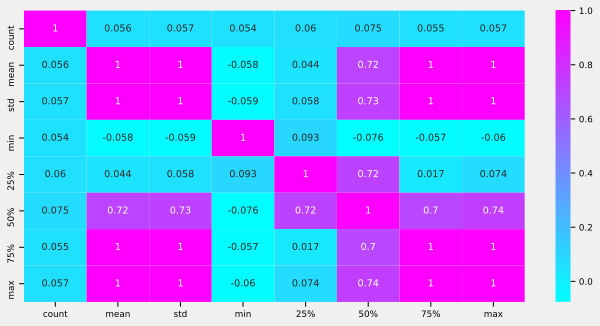

In [98]:
plt.figure(figsize=(10,5))
sns.set_context('paper', font_scale=1)

df =df.corr()


sns.heatmap(df, annot=True, cmap='cool')

### Still too many corrilations  to work with

### Bitcoin_dataset 
This dataset contains lots of data on bitcoin but none on any other cryptocurrancy and is going to be to hard to work with making graphs so lets move on to the individual cyrpocurrancy price CSV files.

In [99]:
bitcoin_cash_price = pd.read_csv('/Users/dawsoncitygeneralstore/school/Data 301/course-project-solo_334/solo project/data/raw/Kaggle files/bitcoin_cash_price.csv')
    
bitcoin_cash_price  

df=(bitcoin_cash_price.drop(['Open','High','Low', 'Volume','Market Cap'],axis=1)
     .rename(columns={"Close": "Bitcoin Cash"})
     .sort_values("Date", ascending=True))

bitcoin_cash_price.info()
bitcoin_cash_price


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        213 non-null    object 
 1   Open        213 non-null    float64
 2   High        213 non-null    float64
 3   Low         213 non-null    float64
 4   Close       213 non-null    float64
 5   Volume      213 non-null    object 
 6   Market Cap  213 non-null    object 
dtypes: float64(4), object(3)
memory usage: 11.8+ KB


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000"
1,"Feb 19, 2018",1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000"
2,"Feb 18, 2018",1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000"
3,"Feb 17, 2018",1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000"
4,"Feb 16, 2018",1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000"
...,...,...,...,...,...,...,...
208,"Jul 27, 2017",417.10,460.97,367.78,385.48,"533,207",-
209,"Jul 26, 2017",407.08,486.16,321.79,365.82,"1,784,640",-
210,"Jul 25, 2017",441.35,541.66,338.09,406.90,"524,908",-
211,"Jul 24, 2017",412.58,578.89,409.21,440.70,"190,952",-


In [100]:
#output `df.describe.T` for numerical columns:
bitcoin_cash_price.describe(exclude = np.object).T

,count,mean,std,min,25%,50%,75%,max
Open,213.0,1103.532911,820.862352,212.18,420.47,670.03,1580.16,3909.00
High,213.0,1199.696995,892.000513,223.70,450.98,756.93,1673.23,4355.62
Low,213.0,1014.952723,743.532709,200.98,395.74,624.30,1498.00,3038.01
Close,213.0,1106.705258,819.384547,213.15,421.03,690.24,1576.92,3923.07


In [101]:
#parsing dates and droping any na values 
bitcoin_cash_price = pd.read_csv('/Users/dawsoncitygeneralstore/school/Data 301/course-project-solo_334/solo project/data/raw/Kaggle files/bitcoin_cash_price.csv', 
    parse_dates=['Date'],
    index_col='Date'
    ).dropna()
bitcoin_cash_price.info()
bitcoin_cash_price

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213 entries, 2018-02-20 to 2017-07-23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        213 non-null    float64
 1   High        213 non-null    float64
 2   Low         213 non-null    float64
 3   Close       213 non-null    float64
 4   Volume      213 non-null    object 
 5   Market Cap  213 non-null    object 
dtypes: float64(4), object(2)
memory usage: 11.6+ KB


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000"
2018-02-19,1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000"
2018-02-18,1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000"
2018-02-17,1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000"
2018-02-16,1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000"
...,...,...,...,...,...,...
2017-07-27,417.10,460.97,367.78,385.48,"533,207",-
2017-07-26,407.08,486.16,321.79,365.82,"1,784,640",-
2017-07-25,441.35,541.66,338.09,406.90,"524,908",-


### Checking a heat map for corrilation

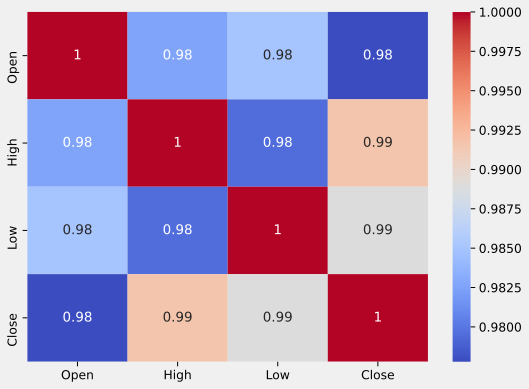

In [102]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

bitcoin_cash =bitcoin_cash_price.corr()

sns.heatmap(bitcoin_cash, annot=True, cmap='coolwarm')

### Much more managable for corrilations

In [103]:
df= (bitcoin_cash_price.drop(['Open','High','Low', 'Volume','Market Cap'],axis=1)
     .rename(columns={"Close": "Bitcoin Cash"})
     .sort_values("Date", ascending=True)
    )
df

,Bitcoin Cash
Date,
2017-07-23,413.06
2017-07-24,440.70
2017-07-25,406.90
2017-07-26,365.82
2017-07-27,385.48
...,...
2018-02-16,1552.20
2018-02-17,1551.39
2018-02-18,1487.46


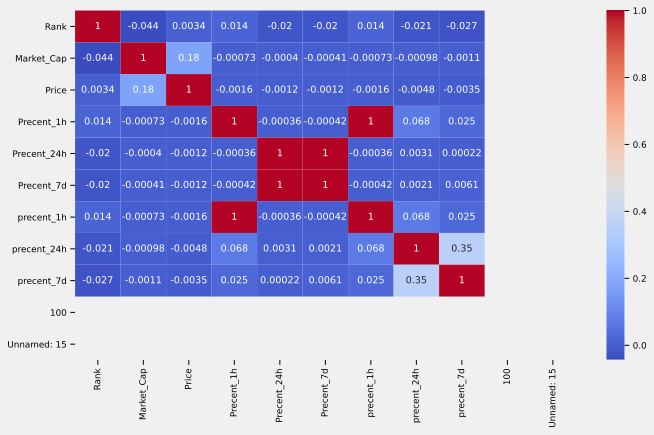

In [104]:


# Reading datasets/coinmarketcap_06122017.csv into pandas
crypto_currancy = pd.read_csv('/Users/dawsoncitygeneralstore/school/Data 301/course-project-solo_334/solo project/data/raw/Cryptocurrency uptodate files/crypto_currency_index.csv')


plt.figure(figsize=(10,6))
sns.set_context('paper', font_scale=1)

crypto_currancy =crypto_currancy.corr()

sns.heatmap(crypto_currancy, annot=True, cmap='coolwarm')


### Very managable for correlations

## Cryptocurrencies: Full dataset, filtering, and reproducibility
<p>A cryptocurrency (or crypto currency) is a digital asset designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger existing in a form of computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership. It typically does not exist in physical form (like paper money) and is typically not issued by a central authority. Cryptocurrencies typically use decentralized control as opposed to centralized digital currency and central banking systems. When a cryptocurrency is minted or created prior to issuance or issued by a single issuer, it is generally considered centralized. When implemented with decentralized control, each cryptocurrency works through distributed ledger technology, typically a blockchain, that serves as a public financial transaction database.

Bitcoin, first released as open-source software in 2009, is the first decentralized cryptocurrency. Since the release of bitcoin, over 7,000 altcoins (alternative variants of bitcoin, or other cryptocurrencies) have been created (e.g. ethereum, ripple, litecoin, monero, digitalcash, zcash).

I started my project with a database from <a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory"> kaggle.com </a>called "Cryptocurrency Historical Prices" made by SRK. The database consisted of 19 files with stock info dating from 2013 to 2018. One file had a large amount of info on just bitcoin and all the stock market attributes spaning 5 years of historical data. Then there are 18 other files  consisted of random cryptocurrencies with their Open, High, Low, Close, Volume, and Market Cap attributes spaning 5 years of historical data. When trying to work with the large file on bitcoin itself, was very unmanagable as there were too many attributes that were linked to each other (see first heat map above) and so it was too hard to remove and focus on finding a path forward. I spent many hours trying to find ways forward researching how to break apart finacial data and find anwsers to the volatility of stocks in the market. I ended up coming across a project in <a href="https://learn.datacamp.com/projects/82"> datacamp.com </a> "Exploring the Bitcoin Cryptocurrency Market". When I found this I was like cool I can take this template and make it my own with the data I picked from kaggle.com.  
    
However, when I looked at the smaller files within this kaggle dataset it wasn't up todate because they only went to Feb 20th 2018 and there are way more cryptocurrencies out on the market now then since 2018. So I went onto <a href="https://coinmarketcap.com/able" > coinmarketcap.com </a> to find a way to grab upto date data with all the cryptocurrencies on the market and then join the previous data with the new data. So I created some new data csv files which are in the upto date file folder.

I am now going to try and find the volatility of all the cryptocurrencies to find the best ones to work with. 
</p>

<p>*<sup>1</sup> <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>






In [105]:
# Reading dataset into pandas
crypto_currancy = pd.read_csv('/Users/dawsoncitygeneralstore/school/Data 301/course-project-solo_334/solo project/data/raw/Cryptocurrency uptodate files/crypto_currency_index.csv')

# Selecting the 'Rank' and the 'Market_Cap' columns
market_cap_raw = crypto_currancy[['Rank','Name','Market_Cap']]

# Counting the number of values
market_cap_raw.count().head()

Rank          3685
Name          3685
Market_Cap    3685
dtype: int64

## Discard the cryptocurrencies with zero a market capitalization
<p>I want to try and <code>query()</code>  the data to eleminate the cryptocurrencies that don't have any market capitalization so I can near down my list. Then I am going to fun another <code>count()</code> for <code>Rank</code> , <code>Name</code> and <code>Market_Cap</code>. This should remove a number of cryptocurrencies from the list. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p> 


In [106]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('Market_Cap >0')

# Counting the number of values again
cap.count()

Rank          2265
Name          2265
Market_Cap    2265
dtype: int64

## What are the top ten cryptocurrencies on the market today?
<p>Bitcoin has been around for a long time, but is bitcoin still dominant in market capitalization or are there other currencies taking more of the market since there is over 2265 that have market capitalization now. Let's plot the top market capitalization for the top 10 coins as a barplot and see which ones are dominating the market today.</p>

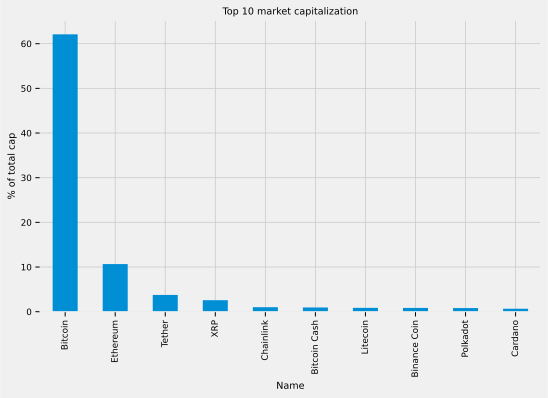

In [107]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
plt.figure(figsize=(8,5))
# Selecting the first 10 rows, setting the index, and Calculating market_cap_perc using method chaining
cap10 = (cap[:10].set_index('Name').assign(market_cap_perc = lambda x: (x.Market_Cap / cap.Market_Cap.sum())*100)) 

# Plotting the barplot with the title defined above and annotating the y axis with the label defined above using method chaining
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE).set_ylabel(TOP_CAP_YLABEL);

## Making the plot easier to read and more informative
<p>The plot shows us that bitcoin is still number one for total percentage of the total cap but the graph is hard really understand because Bitcoin is so much larger then the other cryptocurrencies. Maybe if we change the scale we can better understand the other 9 cryptocurrencies. We will use a log<sup>10</sup> scale instead of percentage to scale the "raw" cap. I will also change the colors of the graph to make the plot more informative. <sup>1</sup>
    
<p>For the colors rationale: bitcoin-cash is a fork of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. The rest get their own color for now.</p>

<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is not really in the scope of my project. Please see the warning above and do your own research.</em></p>

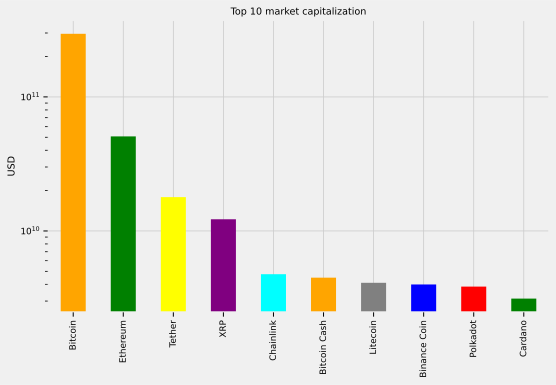

In [108]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'yellow', 'purple', 'cyan', 'orange', 'grey', 'blue', 'red', 'green']
plt.figure(figsize=(8,5))
# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10.Market_Cap.plot.bar(title=TOP_CAP_TITLE, logy=True, color = COLORS)

# Annotating the y axis with 'USD'
ax.set_ylabel('USD')

# Final touch! Removing the xlabel as it is not very informative
ax.set_xlabel('');

## Now to the good stuff! Volatility in cryptocurrencies
<p>The cryptocurrency market has been dramatictly volatile since the stock exchange opened. This project didn't start with a big, bold warning for nothing. Let's checkout the volatility a bit more! We know that there is a correlation with the percent of 1 hour, 24 hours and 7 days. Since 1 hour is a small amount of time I will begin by selecting and plotting the 24 hours and 7 days percentage change. We should be able to see which ones are extremely volatile. </p>

In [109]:
# Selecting the Rank, percent_24h and percent_7d columns
volatility = crypto_currancy[['Rank','Name','precent_24h','precent_7d']]

# Setting the index to 'Rank' and dropping all NaN rows
volatility = volatility.set_index('Name').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('precent_24h')




### Top 10 Losers

In [110]:
volatility.head(10)


,Rank,precent_24h,precent_7d
Name,,,
Electronero,3284,-99.01,-100.00
Pamp Network,2257,-96.87,-97.46
Defi,3415,-92.64,-84.10
Streamit Coin,2302,-91.69,-31.28
Satoshivisioncoin,3497,-90.27,-80.26
CustomContractNetwork,2186,-89.17,-34.21
PopularCoin,1879,-88.02,41.42
IOV BlockChain,3400,-85.73,-85.50
Uniform Fiscal Object,1555,-85.64,0.00


### Top 10 Winners

In [111]:
volatility.tail(10)

,Rank,precent_24h,precent_7d
Name,,,
Maya Preferred 223,3152,418.68,-28.66
General Attention Currency,534,462.13,-2.19
Bitsdaq,953,465.02,359.19
AML Bitcoin,3741,472.84,3.03
CBDAO,2021,606.81,-45.16
Tourist Token,1690,852.85,2.87
SiaCashCoin,1263,919.40,925.19
CMITCOIN,3564,1067.44,1717.74
Advanced Internet Blocks,221,1429.94,766.10


## Well thats a *large* spread in numbers!

<p>With that kind of spread it would be easy to lose or gain money in the cryptocurrency quickly. Below we are going to gragh the top 10 Losers and the top 10 Winners in the market capitalization to see things visually.</p>

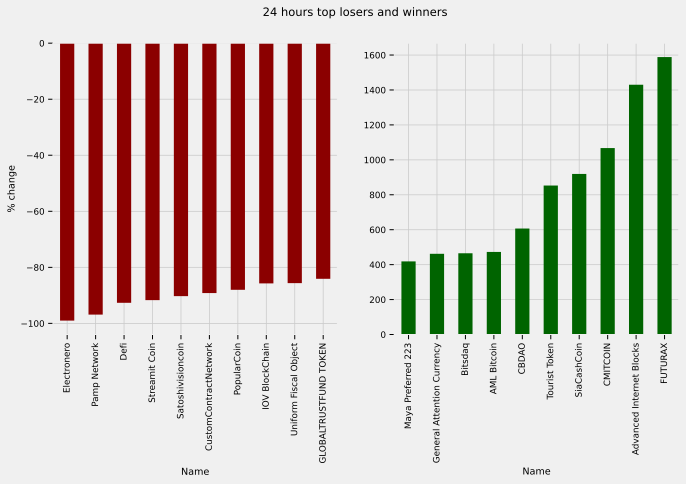

In [112]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    
    # Setting the main title to TITLE
    fig.suptitle(title)
    
    # Setting the ylabel to "% change"
    ax.set_ylabel('% change')
    
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series[-10:].plot.bar(color="darkgreen",ax=axes[1])
    ax.set_ylabel('')
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.precent_24h, DTITLE)



## What would the weekly Series look like?
<p>1600% daily increases means huge changes and FUTURAX is very appealing in my eyes maybe I should quit school and start putting my tution money into FUTRAX Stock. I think I might buy some stocks today.*LOL* Maybe I should wait to finish this project and see if my return on investment is likely to happen.</p>
<p>Ok now that we have looked at the daily increases/decreases lets look at weekly and see what happens there.</p>

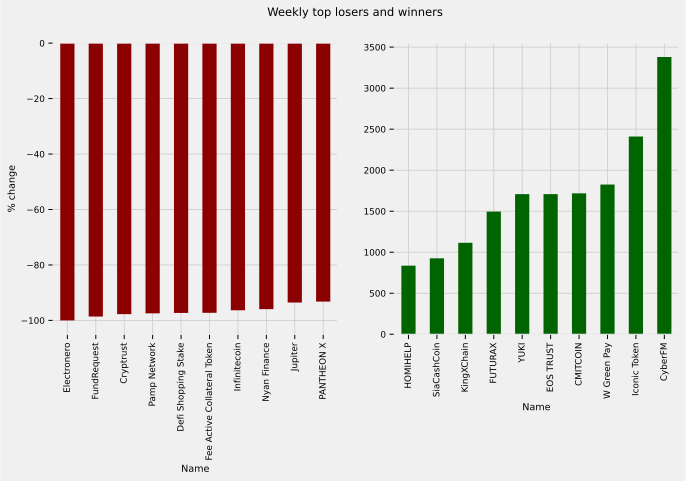

In [113]:
# Sorting percent_change_7d in ascending order
volatility7d = volatility.sort_values("precent_7d")

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.precent_7d, WTITLE);




## How small are these stocks and what is considered small for the cryptocurrency market?
<p>I have never heard of any of these cryptocurrencies above. We can see that there is a significent change in percentage change from 1 to 7 days. The smaller the stock the bigger the risk or reward but it is also very volitile when its small and less stable.</p>

<p>What Does Large Cap (Big Cap) Mean? 
Large cap (sometimes called "big cap") refers to a company with a market capitalization value of more than $10 billion. Large cap is a shortened version of the term "large market capitalization." Market capitalization is calculated by multiplying the number of a company's shares outstanding by its stock price per share. A company’s stock is generally classified as large cap, mid cap or small cap.</p>

<p>Lets look at the large ones for a minute. We will take everything bigger then 10 billion in market cap and see which stocks it tells us are that large.</p>

In [114]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query("Market_Cap > 1E+10")

# Printing out largecaps

largecaps

,Rank,Name,Market_Cap
0,1,Bitcoin,2.957906e+11
1,2,Ethereum,5.077184e+10
2,3,Tether,1.787840e+10
3,4,XRP,1.222235e+10


## Now lets go smaller!

<p>Lets look at the smaller ones for a minute. We will take everything between then 10 billion and 1 billion in market cap and see where they rank in the stock market.</p>

In [115]:
# Selecting everything less than 10 billion and more then 1 billion
microcaps = cap.query("1E+10 > Market_Cap > 1E+9")

# Printing out largecaps

microcaps

,Rank,Name,Market_Cap
4,5,Chainlink,4.757927e+09
5,6,Bitcoin Cash,4.482952e+09
6,7,Litecoin,4.103576e+09
7,8,Binance Coin,3.988658e+09
8,9,Polkadot,3.847021e+09
9,10,Cardano,3.127773e+09
10,11,Bitcoin SV,2.868014e+09
11,12,USD Coin,2.813598e+09
12,13,EOS,2.342491e+09
13,14,Monero,2.035536e+09


## As you can see most coins are tiny
<p>Most cyrptocurrency coins are small and not comparable to large companies in market cap but some say that bitcoin is .</p>

<p><em>Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em> We will compare and do a risk assessment comparing it to gold in the next section</p>

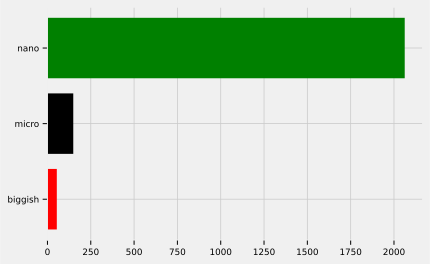

In [116]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.

COLORS = ['red', 'black', 'green']
plt.figure(figsize=(6,4))

def capcount(query_string):
    return cap.query(query_string).count().Rank

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the not_so_small cryptos
biggish = capcount("Market_Cap > 3E+8")

# Same as above for micro ...
micro = capcount("Market_Cap >= 5E+7 & Market_Cap < 3E+8")

# ... and for nano
nano =  capcount("Market_Cap < 5E+7")

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
plt.barh(range(len(values)), values, tick_label=LABELS, color = COLORS);


## Meet Professor William Sharpe

<p>When I ended up coming across data camp I was also able to find a project called <a href="https://learn.datacamp.com/projects/66">"Risk and Returns: The Sharpe Ratio"  </a>. This project helped me try and figure out with my own dataset if there was a way to explore the risks of buying cryptocurrencies and what the rewards where if you found the right cryptocurrency.</p>

<p>When investments may make sense we expect it to return more money than it costs. But returns are only part of the story because they are risky - there may be a range of possible outcomes. How does one compare different investments that may deliver similar results on average, but exhibit different levels of risks?</p>
<p><img style="float: left ; margin: 5px 20px 5px 1px;" width="200" src="https://www.mediatheque.lindau-nobel.org/Content/Assets/Medium/32315___personal-picture-of-william-sharpe.jpg"></p>
<p>William Forsyth Sharpe (born June 16, 1934) is an American economist. He is the STANCO 25 Professor of Finance, Emeritus at Stanford University's Graduate School of Business, and the winner of the 1990 Nobel Memorial Prize in Economic Sciences. Sharpe was one of the originators of the capital asset pricing model (CAPM). He created the Sharpe ratio for risk-adjusted investment performance analysis, and he contributed to the development of the binomial method for the valuation of options, the gradient method for asset allocation optimization, and returns-based style analysis for evaluating the style and performance of investment funds.</p>

<p>When he introduced the <a href="https://web.stanford.edu/~wfsharpe/art/sr/sr.htm"><em>reward-to-variability ratio</em></a> in 1966 that soon came to be called the Sharpe Ratio. It compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.</p>
<p>The Sharpe ratio has been one of the most popular risk/return measures in finance, not least because it's so simple to use. It also helped that Professor Sharpe won a Nobel Memorial Prize in Economics in 1990 for his work on the capital asset pricing model (CAPM).</p>
<p>The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. We will simplify our example and use crytpocurrency stocks instead of a portfolio. We will also use a gold stock and the S&amp;P 500 as a benchmarks rather than the risk-free interest rate because both are readily available at daily frequencies and we do not have to get into converting interest rates from annual to daily frequency. Just keep in mind that you would run the same calculation with portfolio returns and your risk-free rate of choice, e.g, the <a href="https://fred.stlouisfed.org/series/TB3MS">3-month Treasury Bill Rate</a>. </p>
<p>So let's learn about the Sharpe ratio by calculating it for the stocks of our top 5 cryptocurrencies over the last year. As the two different benchmarks we'll use the S&amp;P 500 that measures the performance of the 500 largest stocks in the US and a comparable gold stock with a similar Market cap as per crypto cryptocurrencies. The gold stocks are much higher risk and investors say that the only comparable to cryptocurrency is commodaties like gold. When we use a stock index instead of the risk-free rate, the result is called the Information Ratio and is used to benchmark the return on active portfolio management because it tells you how much more return for a given unit of risk your portfolio manager earned relative to just putting your money into a low-cost index fund.</p>

In [117]:
# Reading in the bitcoin price data
crypto_price = pd.read_csv('/Users/dawsoncitygeneralstore/school/Data 301/course-project-solo_334/solo project/data/raw/Cryptocurrency uptodate files/Top_5_Crypto_1_year.csv', 
    parse_dates=['Date'],
    index_col='Date'
    ).dropna()


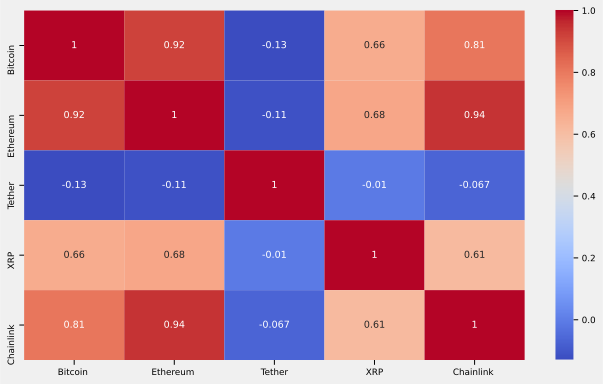

In [118]:
plt.figure(figsize=(10,6))
sns.set_context('paper', font_scale=1)

crypto_map =crypto_price.corr()

sns.heatmap(crypto_map, annot=True, cmap='coolwarm')

## A first look at the data
<p>Let's take a look the data to find out how many observations and variables we have at our disposal.</p>

In [119]:
# Display summary for crypto_price
print('Stocks\n')
crypto_price.info()

crypto_price.head()

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2020-11-15 to 2019-11-15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bitcoin     367 non-null    float64
 1   Ethereum    367 non-null    float64
 2   Tether      367 non-null    float64
 3   XRP         367 non-null    float64
 4   Chainlink   367 non-null    float64
dtypes: float64(5)
memory usage: 17.2 KB


,Bitcoin,Ethereum,Tether,XRP,Chainlink
Date,,,,,
2020-11-15,15955.58789,447.559082,1.000647,0.269642,12.121813
2020-11-14,16068.13867,460.149841,1.000288,0.268342,12.576960
2020-11-13,16317.80859,474.626434,1.000345,0.265191,12.887979
2020-11-12,16276.34375,461.005280,1.000509,0.254903,12.423223
2020-11-11,15701.33984,462.960541,1.000985,0.256259,12.807538


## Plot & summarize daily prices for Crypto Currencies
<p>Before we compare an investment in Crypto Currancies with the the gold stock and the index of the 500 largest companies in the US, let's visualize the data, so we better understand what we're dealing with.</p>

,Bitcoin,Ethereum,Tether,XRP,Chainlink
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,9443.221348,250.918902,1.002035,0.225581,6.059756
std,2103.547288,99.858012,0.004773,0.037452,4.266945
min,4970.788086,110.605873,0.974248,0.139635,1.741144
25%,7765.231445,166.600266,1.000262,0.195508,2.685424
50%,9303.629883,228.194870,1.001419,0.223672,4.089671
75%,10682.633300,353.176605,1.003101,0.249244,9.707786
max,16317.808590,477.051910,1.053585,0.334822,19.098751


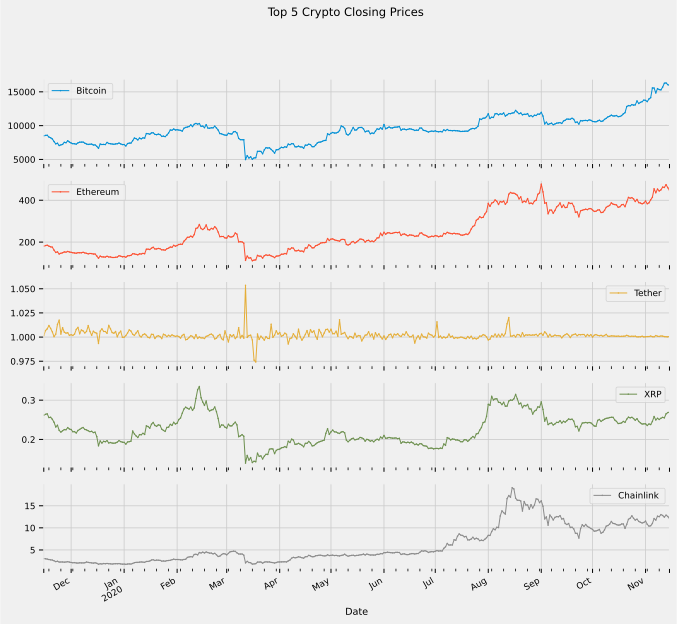

In [120]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# visualize the stock_data

crypto_price.plot(title='Top 5 Crypto Closing Prices', marker='.',linestyle='-',linewidth=1, markersize=1, subplots=True);

# summarize the stock_data
crypto_price.describe()


## Visualize & summarize daily values for the Gold US
We have data of US Gold stock GOLD going back from 2013 to today as one benchmark but for this case since we don't need so much data we will only take the last years worth of data and use only the closing stock price.

Let's also take a closer look at the value of the gold stocks, as our first benchmark.

In [121]:
# Reading in the bitcoin price data
gold = (pd.read_csv('/Users/dawsoncitygeneralstore/school/Data 301/course-project-solo_334/solo project/data/raw/Gold stock/GOLD.csv',
parse_dates=['Date'],
index_col='Date').dropna().drop(['Open','High','Low', 'Volume','Adj Close'],axis=1).rename(columns={"Close": "Gold"}))


gold.head()

,Gold
Date,
2019-11-15,16.570000
2019-11-18,16.889999
2019-11-19,17.049999
2019-11-20,16.990000
2019-11-21,16.639999


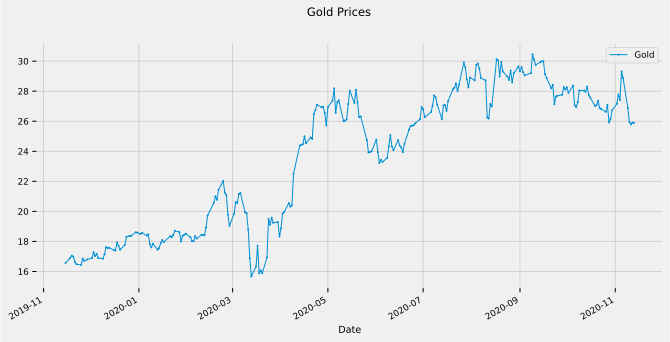

,Gold
count,252.000000
mean,23.683175
std,4.588394
min,15.670000
25%,18.512500
50%,25.265000
75%,27.575000
max,30.459999


In [122]:
# visualize the stock_data
rcParams['figure.figsize'] = 10, 5
gold.plot(title='Gold Prices',marker='.',linestyle='-',linewidth=1, markersize=2, subplots=True)

# Show the plot
plt.show()

#show gold
gold.describe()

## Visualize & summarize daily values for the S&P 500
 We are taking online data of S&P 500 from an API on the IEX cloud to benchmark instead of uploading a csv file. Since we only need one years worth of data we will start the date at november 15th 2019 and end the date at November 15th 2020.

<p>Let's also take a closer look at the value of the S&amp;P 500, our benchmark.

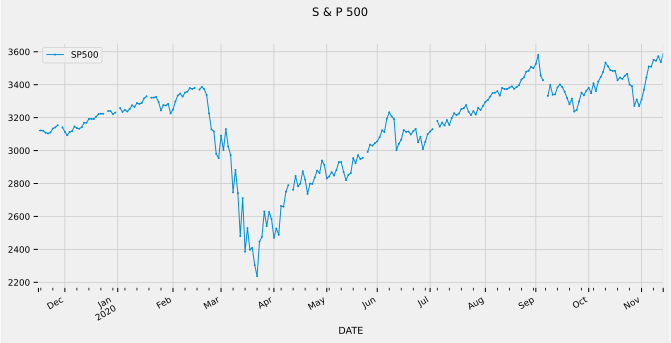

,SP500
count,252.000000
mean,3153.730437
std,269.846321
min,2237.400000
25%,3034.530000
50%,3222.335000
75%,3348.620000
max,3585.150000


In [123]:
# Reading in the benchmark data
rcParams['figure.figsize'] = 10, 5
# Set the start date
start = date(2019,11,15)
end = date(2020,11,15)

# Set the series codes
series = 'SP500'
#For stocks, you'll use the S&P 500 Index

# Import the data
SP_data = DataReader(series, 'fred', start, end)


# Plot the results
SP_data.plot(title='S & P 500',marker='.',linestyle='-',linewidth=1, markersize=2, subplots=True)

# Show the plot
plt.show()

#show S&P 500 
SP_data.describe()


## The inputs for the Sharpe Ratio: Starting with Daily Cryptocurrency Stock Returns
<p>The Sharpe Ratio uses the difference in returns between the investment opportunities under consideration.</p>
<p>However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio. Can you already guess the result?</p>

,Bitcoin,Ethereum,Tether,XRP,Chainlink
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,-0.000912,-0.001087,0.000019,0.000746,-0.001410
std,0.043290,0.057041,0.005851,0.042623,0.073310
min,-0.153889,-0.159243,-0.051993,-0.132922,-0.218385
25%,-0.014593,-0.024717,-0.001974,-0.017038,-0.030926
50%,-0.001330,-0.002796,-0.000029,-0.001634,-0.002048
75%,0.011028,0.016344,0.001913,0.015748,0.028560
max,0.591585,0.734522,0.053976,0.490285,0.848874


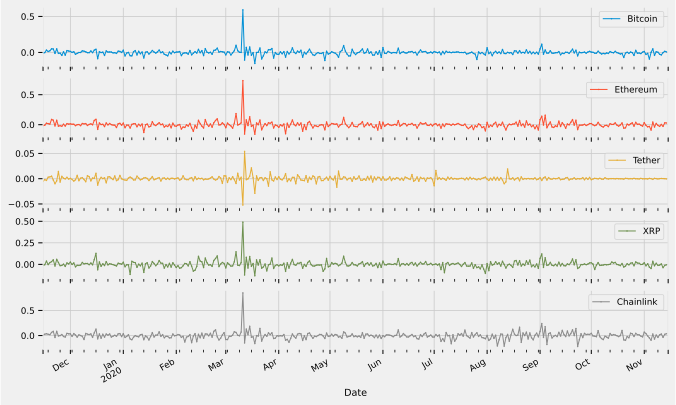

In [124]:
# calculate daily stock_data returns
crypto_returns = crypto_price.pct_change()

rcParams['figure.figsize'] = 10, 7
# plot the daily returns
crypto_returns.plot( marker='.',linestyle='-',linewidth=1, markersize=1, subplots=True);


# summarize the daily returns
crypto_returns.describe()

## Daily Gold stock returns
<p>For the Gold stock, calculating daily returns works just the same way.</p>

,Gold
count,251.000000
mean,0.002237
std,0.030414
min,-0.103331
25%,-0.012113
50%,0.001479
75%,0.018039
max,0.151802


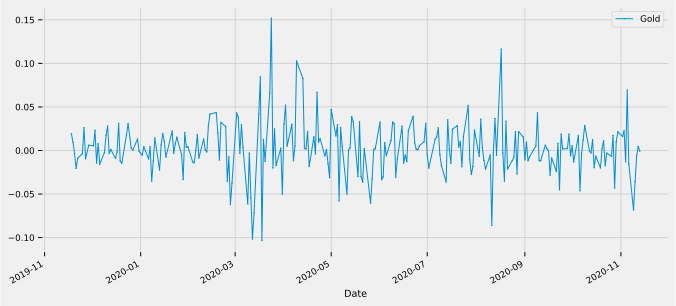

In [125]:
# calculate daily stock_data returns
gold_returns = gold.pct_change()

rcParams['figure.figsize'] = 10, 5
# plot the daily returns
gold_returns.plot(marker='.',linestyle='-',linewidth=1, markersize=1)


# summarize the daily returns
gold_returns.describe()

## Daily S&P 500 returns
<p>For the S&amp;P 500, calculating daily returns works just the same way, we just need to make sure we select it as a <code>Series</code> using single brackets <code>[]</code> and not as a <code>DataFrame</code> to facilitate the calculations in the next step.</p>

count    260.000000
mean       0.000763
std        0.021330
min       -0.119841
25%       -0.005645
50%        0.001857
75%        0.008449
max        0.093828
Name: SP500, dtype: float64

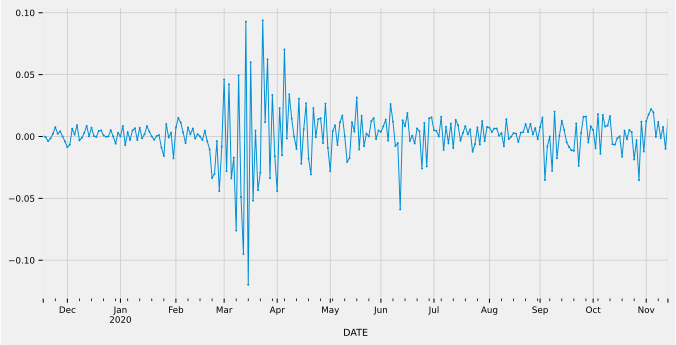

In [126]:
# calculate daily benchmark_data returns
sp_returns =SP_data['SP500'].pct_change().dropna()

rcParams['figure.figsize'] = 10, 5
# plot the daily returns
sp_returns.plot(marker='.',linestyle='-',linewidth=1, markersize=2);

# summarize the daily returns
sp_returns.describe()

## Calculating Excess Returns for Cryptocurrancies vs. Gold
<p>Next, we need to calculate the relative performance of our top 5 cryptocurrency stocks vs. the Gold stock benchmark. This is calculated as the difference in returns between <code>crypto_returns</code> and <code>au_returns</code> for each day.</p>

,Bitcoin,Chainlink,Ethereum,Gold,Tether,XRP
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,-0.000848,-0.004482,-0.001772,-0.002237,-0.000045,0.000484
std,0.047740,0.080111,0.062567,0.030414,0.006666,0.046000
min,-0.153889,-0.218385,-0.159243,-0.151802,-0.051993,-0.132922
25%,-0.014278,-0.036278,-0.026294,-0.018039,-0.001984,-0.018163
50%,-0.001224,-0.006258,-0.002660,-0.001479,-0.000009,-0.001688
75%,0.010322,0.024168,0.014782,0.012113,0.001921,0.013609
max,0.591585,0.848874,0.734522,0.103331,0.053976,0.490285


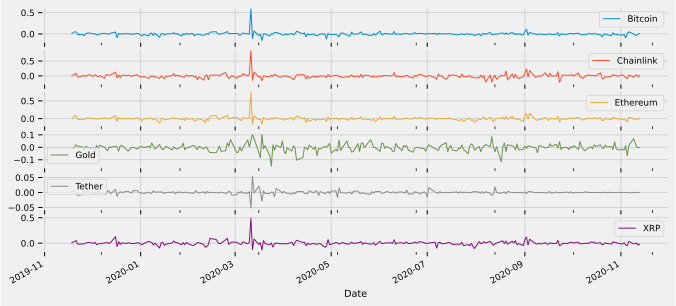

In [127]:
# calculate the difference in daily returns
g_excess_returns = crypto_returns.sub(gold_returns, axis=0,fill_value=0).dropna()

rcParams['figure.figsize'] = 10, 5
# plot the excess_returns
g_excess_returns.plot(kind= 'line',linewidth=1, markersize=1,subplots=True);

# summarize the excess_returns
g_excess_returns.describe()

## Calculating Excess Returns for Cryptocurrancies vs. S&P 500
<p>Next, we need to calculate the relative performance of our top 5 cryptocurrency stocks vs. the S&amp;P 500 benchmark. This is calculated as the difference in returns between <code>stock_returns</code> and <code>sp_returns</code> for each day.</p>

,Bitcoin,Ethereum,Tether,XRP,Chainlink
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,-0.001695,-0.002548,-0.000801,-0.000391,-0.005235
std,0.050910,0.064663,0.023213,0.049140,0.081609
min,-0.114868,-0.137908,-0.094860,-0.113446,-0.207568
25%,-0.019915,-0.027212,-0.010768,-0.023097,-0.037744
50%,-0.003765,-0.003539,-0.001737,-0.002093,-0.003111
75%,0.011592,0.016201,0.006260,0.015633,0.023288
max,0.640453,0.783390,0.149089,0.539154,0.897743


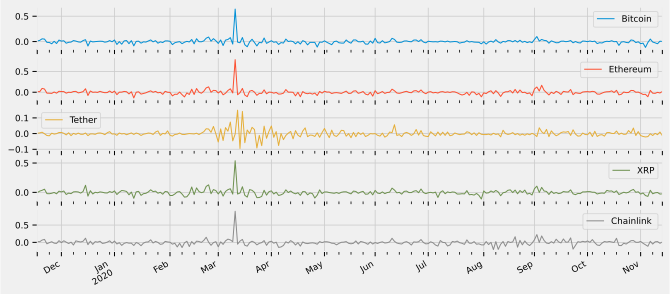

In [128]:
# calculate the difference in daily returns
excess_returns = crypto_returns.sub(sp_returns, axis=0).dropna()

rcParams['figure.figsize'] = 10, 5
# plot the excess_returns
excess_returns.plot(kind= 'line',linewidth=1, markersize=1,subplots=True);

# summarize the excess_returns
excess_returns.describe()

## The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Cryptocurrency Stocks vs Gold
<p>Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the <code>g_excess_returns</code>. This tells us how much more or less the Cryptocurrancy investment yields per day compared to the Gold benchmark.</p>

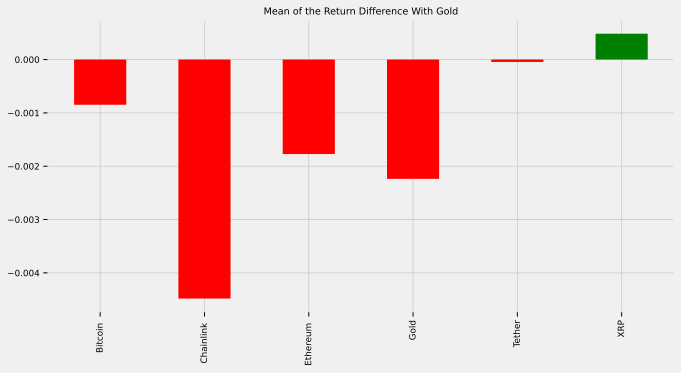

In [129]:
rcParams['figure.figsize'] = 10, 5

COLORS = ['red', 'red', 'red', 'red', 'red', 'green']


# calculate the mean of excess_returns 
g_avg_excess_return = g_excess_returns.mean()

# plot avg_excess_returns
g_avg_excess_return.plot.bar(title='Mean of the Return Difference With Gold',color = COLORS);

## The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Cryptocurrancy Stocks vs S&P 500
<p>Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the <code>excess_returns</code>. This tells us how much more or less the Cryptocurrancy investment yields per day compared to the benchmark.</p>

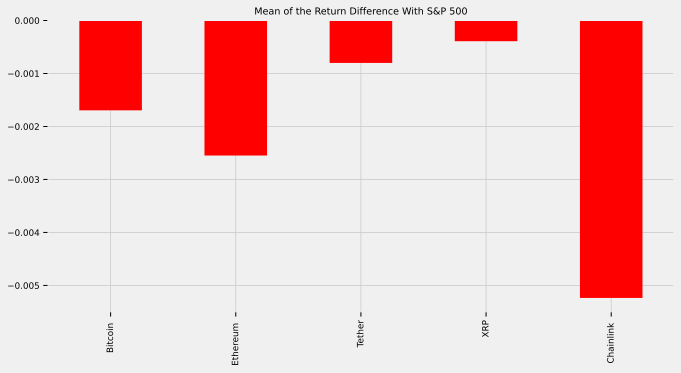

In [130]:
rcParams['figure.figsize'] = 10, 5

COLORS = ['red', 'red', 'red', 'red', 'red']

# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference With S&P 500',color = COLORS);

## The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference with Gold
<p>It looks like there was quite a bit of a difference between average daily returns for XRP and Chainlink.<p>
<p>Next, we calculate the standard deviation of the <code>g_excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the Gold.</p>

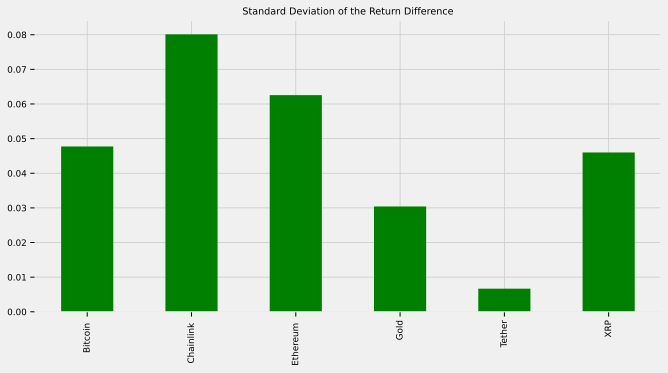

In [131]:
rcParams['figure.figsize'] = 10, 5
COLORS = ['green', 'green', 'green', 'green', 'green', 'green']


# calculate the standard deviations
g_sd_excess_return = g_excess_returns.std()

# plot the standard deviations                      
g_sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference',color = COLORS)

## The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference with S&P 500 stocks
<p>It looks like there was quite a bit of a difference between average daily returns for Tether and Chainlink.<p>
<p>Next, we calculate the standard deviation of the <code>excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&amp;P 500.</p>

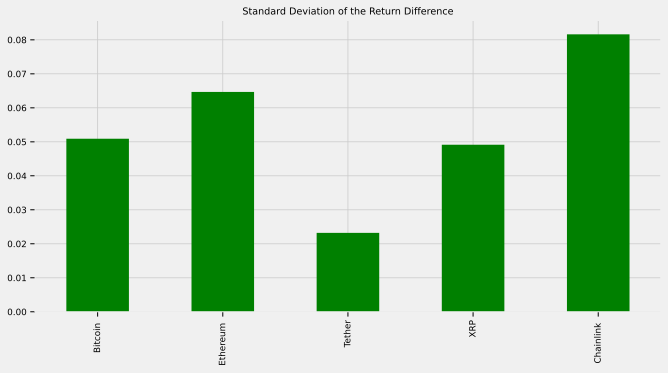

In [132]:
rcParams['figure.figsize'] = 10, 5

COLORS = ['green', 'green', 'green', 'green', 'green']


# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations                      
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference',color = COLORS)

## Putting it all together
<p>Now we just need to compute the ratio of <code>g_avg_excess_returns</code> and <code>sd_excess_returns</code>. The result is now finally the <em>Sharpe ratio</em> and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.</p>
<p>The Sharpe Ratio is often <em>annualized</em> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252</p>

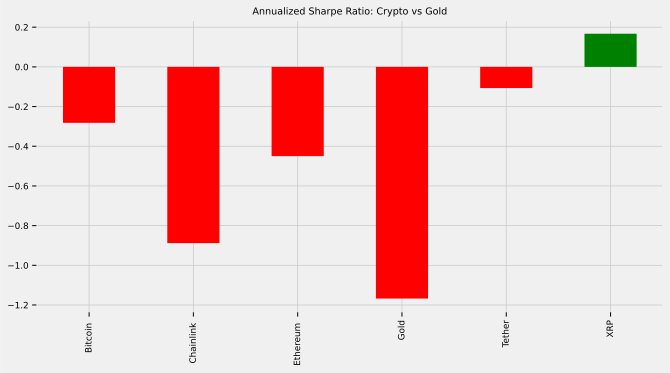

In [133]:
rcParams['figure.figsize'] = 10, 5

COLORS = ['red', 'red', 'red', 'red', 'red', 'Green']

# calculate the daily sharpe ratio
g_daily_sharpe_ratio = g_avg_excess_return.div(g_sd_excess_return)

# annualize the sharpe ratio
g_annual_factor = np.sqrt(252)
g_annual_sharpe_ratio = g_daily_sharpe_ratio.mul(g_annual_factor)

# plot the annualized sharpe ratio 
g_annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Crypto vs Gold',color = COLORS)

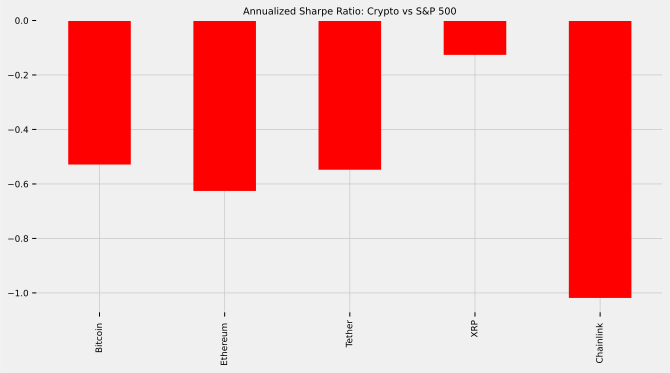

In [134]:
rcParams['figure.figsize'] = 10, 5

COLORS = ['red', 'red', 'red', 'red', 'red']

# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio 
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Crypto vs S&P 500',color = COLORS);

## Conclusion
<p>The first thing I wanted to figure out was how volatile were the cryptocurrencies on the market and which ones were the most volatile? I found that none of the major ones showed up as being volatile. Infact, most of the ones that showed up were ones I never even heard of. Then I wanted to take the top 5 cryptocurrencies and find out how they compare as an investment option to other stocks on the market. Because investors say that cryptocurrencies are not really comparable due to their volatility they recommend that it is closest to gold stocks. So I wanted to see if that was true and how to measure that in the aspect of investment.

 After looking through all the graphs you will see in the graph below “The inputs for the Sharpe Ratio: Starting with Daily Cryptocurrency Stock Returns” that all the Cryptocurrency stocks went up right around mid March when COVID-19 hit the world hard. Then if you look at “Daily Gold stock returns” just below the last one you will see that gold did the same thing. I have invested in gold stocks for 10 years now and the reason for that is that when the economy takes a hit everyone gets scared and invests their money in gold stocks. This was the same thing that happened in 2008 gold started to skyrocket while other stocks took a big hit. So this tells me that the investors are right that Cryptocurrency reacts much like gold in the stock market. 

I wanted to also compare it to the S&amp;P 500 to make sure that it wasn’t comparable in measuring the risk to reward. After doing that you will see that in the  graph you see only negatives verses the one above it comparing it to gold, you will see one positive Cryptocurrency. This tells me that even though the top 4 Cryptocurrencies fall in the same category as the S&amp;P 500 they are just to volatile in nature to show consistent investment returns. 


This means that an investment in XRP would be comparable to investing in gold stocks at the moment. In other words, in risk-adjusted terms, the investment in XRP would have been more attractive then investing in gold stocks. This difference was mostly driven by differences in return rather than risk between Gold and XRP. The risk of choosing XRP over Gold (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for XRP ends up higher mainly due to the higher average daily returns for XRP.

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis. Using gold as a benchmark vs S&P 500 stocks let us compare Cryptocurrencies to ‘apples to apples’. </p>

In [135]:
# Uncomment which cryptocurrancy you would invest in.
#buy_bitcoin= True
#buy_Ethereum= True
#buy_Tether= True
#buy_XRP= True
#buy_Chainlink= True